In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [7]:
folder = "generated_noise_bernoulli_fc_models"

In [9]:
model_names = np.load(folder+"_model_names.npy")
recon_losses = np.load(folder+"_test_recon_losses.npy")
betavae_metric_accuracies = np.load(folder+"_betavaemetric_scores.npy")
factorvae_metric_accuracies = np.load(folder+"_factorvaemetric_scores.npy")
mig_scores = np.load(folder+"_mig_scores.npy")

In [11]:
types=[]

for name in model_names:
    if "betavae" in name:
        types.append("betavae")
    elif "factorvae" in name:
        types.append("factorvae")
    elif "controlvae" in name:
        types.append("controlvae")
    else:
        print("Problem in the model name")
        break
        
print(model_names)

['betavae_beta1_e50_custom_noise.dat' 'betavae_beta4_e50_custom_noise.dat'
 'controlvae_epoch50_lr1e2_Cmax20_Cstep4.5_bern_noisy_gen.dat'
 'gen_noise_factorvae_epochs50_gamma5_lrvae0.01_lrd0.0001.dat']


In [12]:
##### Param values has to be written by hand 
param_values=[1,4,20,5]

In [13]:
def plot_recon_accuracy(recons, accuracies, types, values, metric_name):
    color_per_type = {"betavae":[255,100,0], "factorvae":[50,150,50],"controlvae":[0,0,255]}
    param_name_per_type = {"betavae": r'$\beta$', "factorvae":r'$\gamma$',"controlvae":r'$C_{max}$'}
    for i in range(len(accuracies)):
        error = np.std(accuracies[i])
        mean_accuracy=np.mean(accuracies[i])
        color=np.array(color_per_type[types[i]])
        plt.errorbar(recons[i],mean_accuracy, yerr=error, fmt='o', c=color/255.0)
        param_name = param_name_per_type[types[i]]
        plt.annotate(param_name+"="+str(values[i]), (recons[i], mean_accuracy),ha='center',va='top')
    plt.xlabel("Reconstruction loss")
    plt.ylabel("Accuracy")
    plt.title(metric_name+" accuracy against reconstruction loss per model")
    blue_line = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=15, label='ControlVAE')
    red_line = mlines.Line2D([], [], color='darkorange', marker='.',
                          markersize=15, label='BetaVAE')
    green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='FactorVAE')
    plt.legend(handles=[blue_line,red_line,green_line])
    plt.show()

In [14]:
plt.rcParams["figure.figsize"] = (6,4)

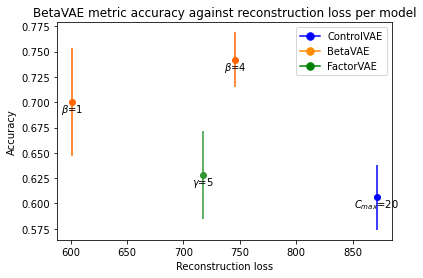

In [15]:
plot_recon_accuracy(recon_losses, betavae_metric_accuracies, types, param_values, "BetaVAE metric")

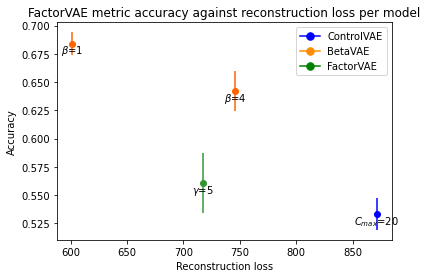

In [16]:
plot_recon_accuracy(recon_losses, factorvae_metric_accuracies, types, param_values, "FactorVAE metric")

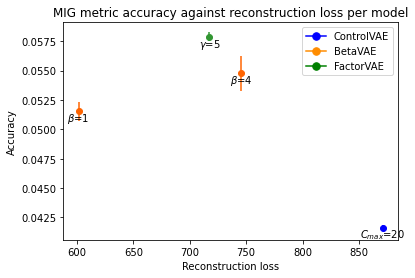

In [17]:
plot_recon_accuracy(recon_losses, mig_scores, types, param_values, "MIG metric")